In [2]:
import numpy as np
import pandas as pd
import feather
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.preprocessing import RobustScaler

In [44]:
rootdir = Path().resolve().parent.parent.parent
df = feather.read_dataframe(rootdir / "data" / "cache" / "df" / "ppo_df.feather")

In [45]:
df.head(1)

,timestamp,price,max_price,min_price,buy_price,sell_price,spread_upper,spread_lower,dsharp_1,area_1,change_1,maxlen_1,minlen_1,dsharp_2,area_2,change_2,maxlen_2,minlen_2,fold
0,1609432500,28563,28705,28517,28705,28517,0.004971,-0.00161,-0.445808,2.275032,0.534666,6.0,2.0,-0.292414,0.292414,0.292414,0.0,0.0,0.0


In [46]:
features = np.array(df.columns[6 : -1])
print(len(features))
features

12


array(['spread_upper', 'spread_lower', 'dsharp_1', 'area_1', 'change_1',
       'maxlen_1', 'minlen_1', 'dsharp_2', 'area_2', 'change_2',
       'maxlen_2', 'minlen_2'], dtype=object)

In [47]:
def plot_hist(ax, x, f):
    ax.hist(x, bins=100)
    ax.set_title(f, fontsize=15)

In [58]:
len_features = [
    f for f in features if (
        ("len_" in f) 
        or ("area_" in f) 
        or ("change_" in f)
    )
]

dfa = df.copy()
dfa[len_features] = np.log1p(dfa[len_features])
dfa[features] = RobustScaler(quantile_range=(5, 95)).fit_transform(dfa[features])
dfa[features] = np.clip(dfa[features], -1, 1)

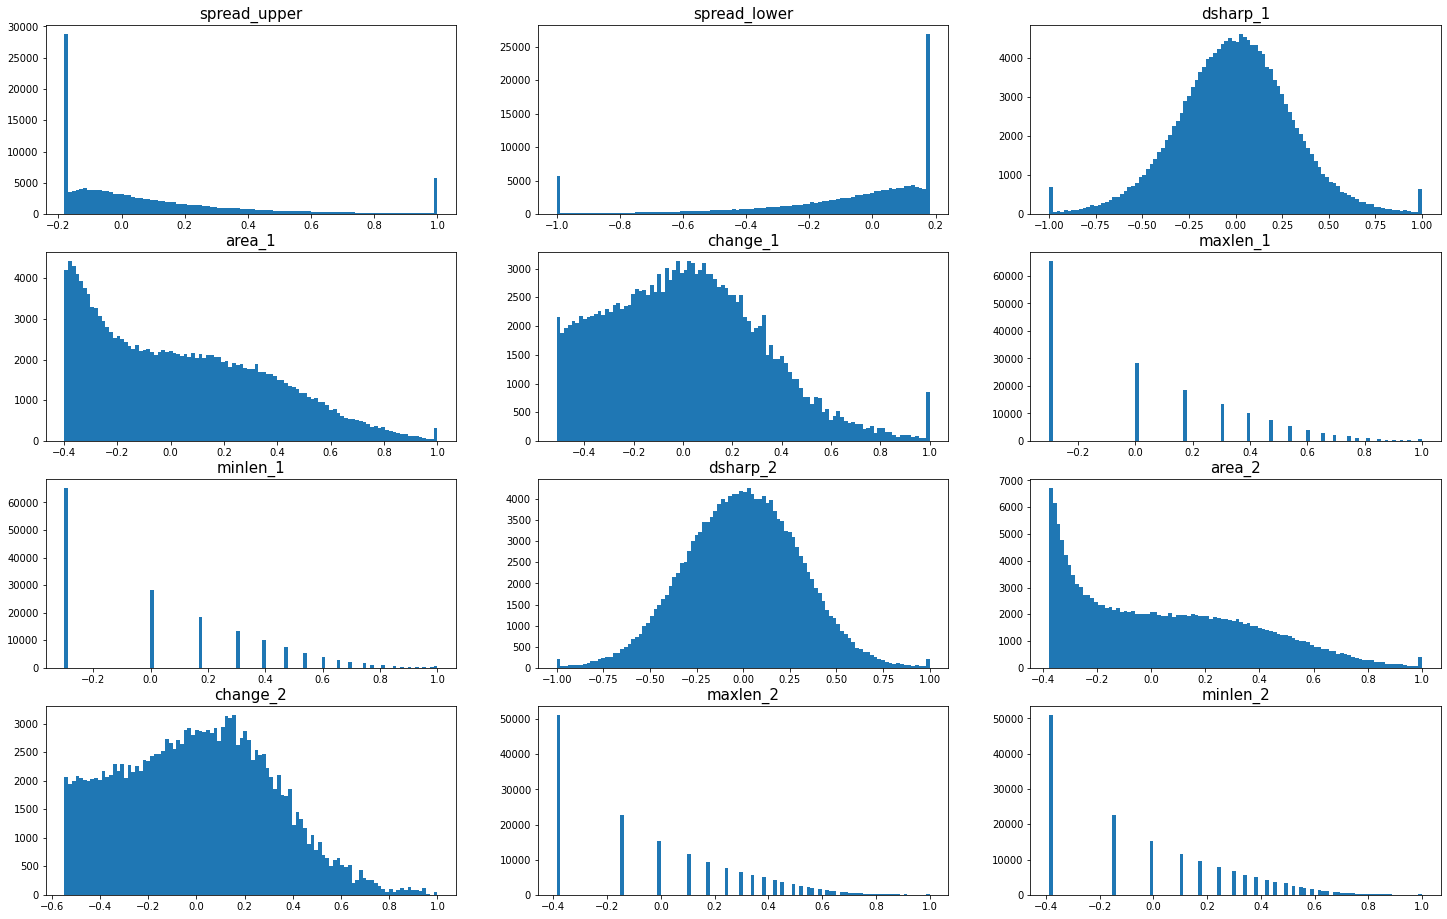

In [59]:
fig, axes = plt.subplots(4, 3, figsize=(25, 16))
axes = axes.flatten()
for ax, f in zip(axes, features):
    plot_hist(ax, dfa[f].values, f)